<a href="https://colab.research.google.com/github/EugeneHsiung/datasci_3_eda/blob/main/datasci_3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [53]:
!pip install pandas_profiling

In [97]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# Importing Data

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/healthcare_data_cleaning.csv') #from assignment #2
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


In [56]:
df.shape  #105000 rows, 20 columns

(105000, 20)

In [57]:
df.columns

Index(['Patient Age', 'Gender', 'City of Residence', 'State of Residence',
       'Has Insurance', 'Visited Last Month', 'Payment Method',
       'Preferred Doctor', 'Disease Diagnosed', 'Medication Prescribed',
       'Type of Appointment', 'Average Heart Rate', 'Average BP',
       'Height (in cm)', 'Weight (in kg)', 'Payment Due ($)',
       'Last Visit (days ago)', 'Visit Duration (mins)', 'Number of Tests',
       'Prescription Cost ($)'],
      dtype='object')

In [58]:
df.sample(10)      #data sample

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
5734,70,missing,Isabelbury,Massachusetts,No,No,Card,Dr. Brown,None,Med_D,Follow-Up,88,87,171,70,missing,188,104,6,116.43655760591918
10851,86,Female,South Jessicatown,Connecticut,missing,Yes,Insurance,Dr. Johnson,missing,Med_E,Specialist,68,94,178,44,66.01978998215485,190,84,missing,129.86702995115164
60466,19,Other,East Kari,Ohio,No,Yes,Card,Dr. Jones,missing,Med_D,Specialist,86,110,182,40,241.46417041395213,183,115,6,82.42214492265566
77947,missing,Male,South Austin,Nebraska,Yes,No,Cash,Dr. Johnson,None,Med_D,Emergency,81,80,187,71,46.66729089766647,184,22,3,3.031331398166548
4709,41,Other,Lake Valerieberg,Florida,Yes,Yes,missing,Dr. Williams,Flu,missing,Emergency,78,100,178,107,140.89198575759949,184,55,5,147.21738350341224
91427,19,Other,Velezmouth,California,Yes,Yes,Insurance,Dr. Jones,Covid-19,Med_E,Specialist,81,128,181,41,55.56535576756399,201,108,3,97.62218466860132
62978,48,Male,Riveraborough,Montana,No,Yes,missing,Dr. Williams,Flu,Med_B,Specialist,97,80,188,54,221.3481980319513,191,117,4,81.11877337045924
83801,30,Male,missing,Hawaii,Yes,Yes,Card,Dr. Brown,None,Med_E,Emergency,66,136,199,66,455.2735128707211,187,83,2,79.14695944835606
19258,29,Male,East Williamburgh,Kentucky,No,No,Cash,Dr. Williams,None,Med_B,Emergency,missing,102,159,74,236.43779352353562,162,34,2,84.59781109670931
61213,61,Other,Jessicatown,Oregon,Yes,No,Card,Dr. Brown,Flu,Med_A,General,75,112,172,79,285.92326176687834,189,12,4,107.20800781200417


In [59]:
df.isnull().sum()  # Look for missingness

Patient Age              0
Gender                   0
City of Residence        0
State of Residence       0
Has Insurance            0
Visited Last Month       0
Payment Method           0
Preferred Doctor         0
Disease Diagnosed        0
Medication Prescribed    0
Type of Appointment      0
Average Heart Rate       0
Average BP               0
Height (in cm)           0
Weight (in kg)           0
Payment Due ($)          0
Last Visit (days ago)    0
Visit Duration (mins)    0
Number of Tests          0
Prescription Cost ($)    0
dtype: int64

In [60]:
df.dropna()
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


In [61]:
df.dtypes

Patient Age              object
Gender                   object
City of Residence        object
State of Residence       object
Has Insurance            object
Visited Last Month       object
Payment Method           object
Preferred Doctor         object
Disease Diagnosed        object
Medication Prescribed    object
Type of Appointment      object
Average Heart Rate       object
Average BP               object
Height (in cm)           object
Weight (in kg)           object
Payment Due ($)          object
Last Visit (days ago)    object
Visit Duration (mins)    object
Number of Tests          object
Prescription Cost ($)    object
dtype: object

In [71]:
import pandas as pd

# Convert 'Average Heart Rate' to float
df['Average Heart Rate'] = pd.to_numeric(df['Average Heart Rate'], errors='coerce').astype(float)

# Convert 'Average BP' to float
df['Average BP'] = pd.to_numeric(df['Average BP'], errors='coerce').astype(float)

# Convert 'Height (in cm)' to float
df['Height (in cm)'] = pd.to_numeric(df['Height (in cm)'], errors='coerce').astype(float)

# Convert 'Weight (in kg)' to float
df['Weight (in kg)'] = pd.to_numeric(df['Weight (in kg)'], errors='coerce').astype(float)

# Convert 'Payment Due ($)' to float, handling 'missing' values
df.loc[:, 'Payment Due ($)'] = df['Payment Due ($)'].apply(lambda x: float(x) if x != 'missing' else float('nan'))  #Reference using lamdas: https://book.datascience.appliedhealthinformatics.com/docs/Ch2/pandas (2.1)


In [72]:
df.dtypes

Patient Age               object
Gender                    object
City of Residence         object
State of Residence        object
Has Insurance             object
Visited Last Month        object
Payment Method            object
Preferred Doctor          object
Disease Diagnosed         object
Medication Prescribed     object
Type of Appointment       object
Average Heart Rate       float64
Average BP               float64
Height (in cm)           float64
Weight (in kg)           float64
Payment Due ($)          float64
Last Visit (days ago)     object
Visit Duration (mins)     object
Number of Tests           object
Prescription Cost ($)     object
dtype: object

# Univariate Analysis
Manually perform a univariate analysis to understand the distribution of each variable. This includes calculating measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR).
Visualize the distribution of select numerical variables using histograms.

In [102]:
# Statistical Measures
df[['Average Heart Rate','Average BP','Height (in cm)','Weight (in kg)','Payment Due ($)']].describe()

,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($)
count,99722.000000,99745.000000,99756.000000,99736.000000,99771.000000
mean,79.523144,109.513179,174.550483,69.683123,249.687203
std,10.017359,14.399892,10.021194,14.725835,144.562123
min,50.000000,80.000000,140.000000,40.000000,0.000146
25%,73.000000,99.000000,168.000000,59.000000,124.381312
50%,80.000000,110.000000,175.000000,70.000000,249.092391
75%,86.000000,120.000000,181.000000,80.000000,375.210147
max,120.000000,140.000000,210.000000,135.000000,499.999999


In [103]:
# Central tendency and measures of spread for Average Heart Rate
mean3 = df['Average Heart Rate'].mean()
median3 = df['Average Heart Rate'].median()
mode3 = df['Average Heart Rate'].mode().values[0]
range3 = df['Average Heart Rate'].max() - df['Average Heart Rate'].min()
variance3 = df['Average Heart Rate'].var()
std_dev3= df['Average Heart Rate'].std()      #Standard Deviation calculation
iqr3 = df['Average Heart Rate'].quantile(0.75) - df['Average Heart Rate'].quantile(0.25)     #IRQ calculation

In [104]:
print(mean3)
print(median3)
print(mode3)
print(range3)
print(variance3)
print(std_dev3)
print(iqr3)

69.68312344589717
70.0
71.0
95.0
216.8502073834073
14.725834692247748
21.0


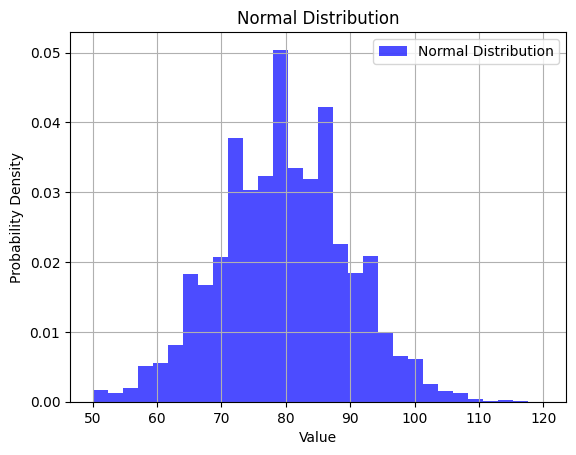

In [105]:
# Histogram for Average Heart Rate
plt.hist(df['Average Heart Rate'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# Central tendency and measures of spread for Average BP
mean = df['Average BP'].mean()
median = df['Average BP'].median()
mode = df['Average BP'].mode().values[0]
range = df['Average BP'].max() - df['Average BP'].min()
variance = df['Average BP'].var()
std_dev= df['Average BP'].std()      #Standard Deviation calculation
iqr = df['Average BP'].quantile(0.75) - df['Average BP'].quantile(0.25)     #IRQ calculation

In [82]:
print(mean)
print(median)
print(mode)
print(range)
print(variance)
print(std_dev)
print(iqr)

109.51317860544388
110.0
80.0
60.0
207.3568828874232
14.399891766517664
21.0


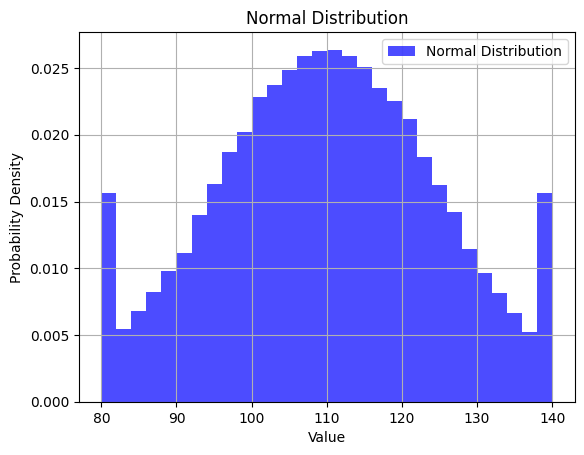

In [98]:
# Histogram for Average BP
plt.hist(df['Average BP'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Central tendency and measures of spread for Height (in cm)
mean1 = df['Height (in cm)'].mean()
median1 = df['Height (in cm)'].median()
mode1 = df['Height (in cm)'].mode().values[0]
range1 = df['Height (in cm)'].max() - df['Height (in cm)'].min()
variance1 = df['Height (in cm)'].var()
std_dev1= df['Height (in cm)'].std()      #Standard Deviation calculation
iqr1 = df['Height (in cm)'].quantile(0.75) - df['Height (in cm)'].quantile(0.25)     #IRQ calculation

In [84]:
print(mean1)
print(median1)
print(mode1)
print(range1)
print(variance1)
print(std_dev1)
print(iqr1)

174.55048317895665
175.0
174.0
70.0
100.4243272689166
10.021193904366715
13.0


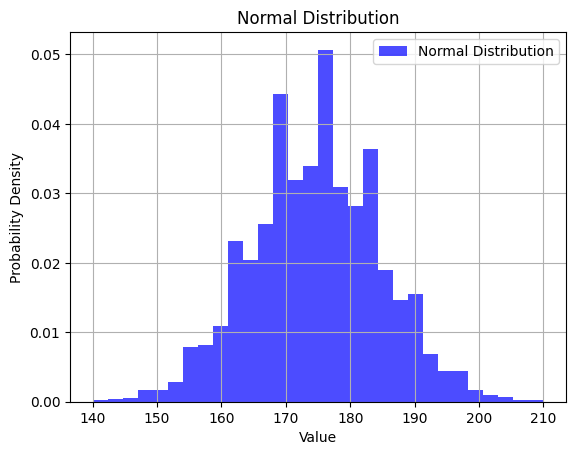

In [99]:
# Histogram for Height (in cm)
plt.hist(df['Height (in cm)'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Central tendency and measures of spread for Weight (in kg)
mean2 = df['Weight (in kg)'].mean()
median2 = df['Weight (in kg)'].median()
mode2 = df['Weight (in kg)'].mode().values[0]
range2 = df['Weight (in kg)'].max() - df['Weight (in kg)'].min()
variance2 = df['Weight (in kg)'].var()
std_dev2= df['Weight (in kg)'].std()      #Standard Deviation calculation
iqr2 = df['Weight (in kg)'].quantile(0.75) - df['Weight (in kg)'].quantile(0.25)     #IRQ calculation

In [89]:
print(mean2)
print(median2)
print(mode2)
print(range2)
print(variance2)
print(std_dev2)
print(iqr2)

69.68312344589717
70.0
71.0
95.0
216.8502073834073
14.725834692247748
21.0


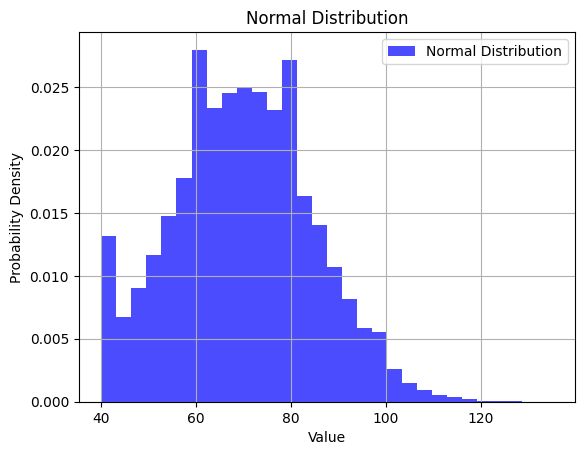

In [100]:
# Histogram for Weight (in kg)
plt.hist(df['Weight (in kg)'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Central tendency and measures of spread for Payment Due ($)
mean4 = df['Payment Due ($)'].mean()
median4 = df['Payment Due ($)'].median()
mode4 = df['Payment Due ($)'].mode().values[0]
range4 = df['Payment Due ($)'].max() - df['Payment Due ($)'].min()
variance4 = df['Payment Due ($)'].var()
std_dev4= df['Payment Due ($)'].std()      #Standard Deviation calculation
iqr4 = df['Payment Due ($)'].quantile(0.75) - df['Payment Due ($)'].quantile(0.25)     #IRQ calculation

In [92]:
print(mean4)
print(median4)
print(mode4)
print(range4)
print(variance4)
print(std_dev4)
print(iqr4)

249.68720297740094
249.09239132193855
0.20270487029577788
499.99985252586214
20898.207356234598
144.56212282695145
250.82883481933075


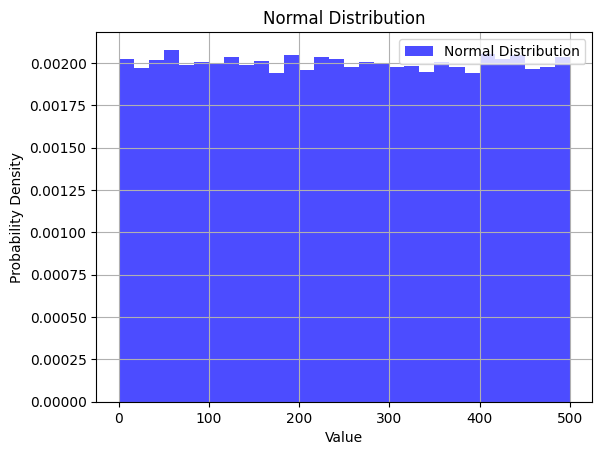

In [101]:
# Histogram for Payment Due ($)
plt.hist(df['Payment Due ($)'], bins=30, density=True, alpha=0.7, color='blue', label='Normal Distribution')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Bivariate Analysis
-Analyze the relationship between pairs of variables.
Use scatter plots to explore potential relationships between two numerical variables.

-For categorical and numerical variable pairs, use boxplots.
Compute correlation coefficients for numerical variables and document any strong correlations observed.

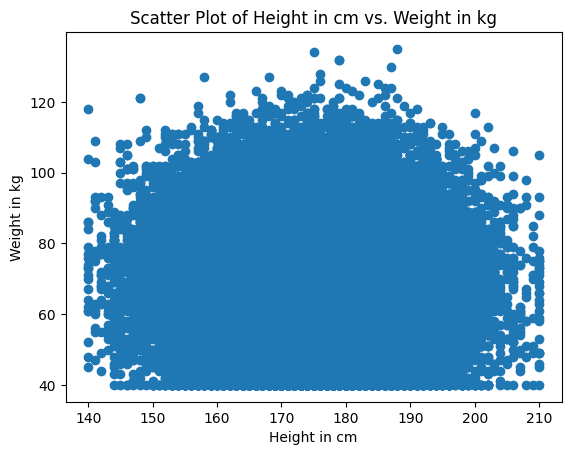

In [108]:
# Scatter plot for height and weight
plt.scatter(df['Height (in cm)'], df['Weight (in kg)'])
plt.title('Scatter Plot of Height in cm vs. Weight in kg')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

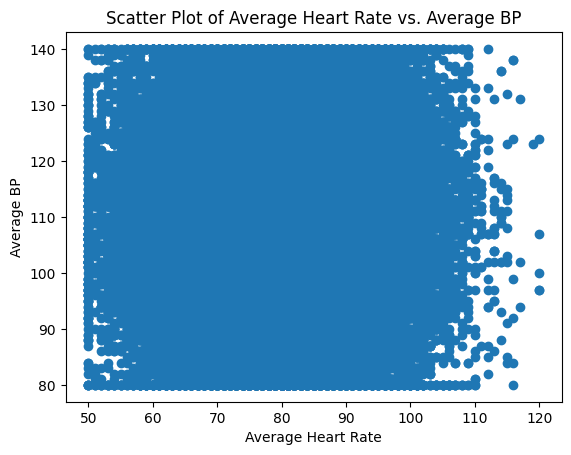

In [109]:
# Scatter plot for Average Heart Rate and Average BP
plt.scatter(df['Average Heart Rate'], df['Average BP'])
plt.title('Scatter Plot of Average Heart Rate vs. Average BP')
plt.xlabel('Average Heart Rate')
plt.ylabel('Average BP')
plt.show()